<a href="https://colab.research.google.com/github/arpanastanley24/Prediction-of-cirrhosis/blob/main/Cirrhosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFICATION OF CIRRHOSIS**

* Cirrhosis is a chronic liver disease that occurs when healthy liver tissue is replaced by scar tissue, leading to a progressive loss of liver function.

* The scar tissue that forms in the liver can block blood flow through the liver and prevent it from working properly.

* Cirrhosis can have a number of causes, including chronic hepatitis B or C, alcohol abuse, nonalcoholic fatty liver disease, and autoimmune disorders.

### **SYMPTOMS**

Symptoms of cirrhosis can include

* fatigue

* jaundice

* itching

* bruising easily and

* abdominal swelling

### **TREATMENT**

There is no cure for cirrhosis, but treatment can help manage the symptoms and slow the progression of the disease. Diagnosis of this disease includes procedures like blood tests, medical history analysis, physical examination, imaging studies and so on. The fatal stages of cirrhosis are easily diagnosed but at this stage the liver is severely damaged and is no longer able to function properly.

Early diagnosis is necessary to save the liver of a patient. Liver biopsy can identify cirrhosis at early stage but it require to operate on the patient and also is time consuming. So, there is a necessity of a intelligent system which could identify cirrhosis even at earlier stages with the help of different biomarkers.Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism.

## **PROBLEM STATEMENT**

* In this project our goal is to identify liver cirrhosis at different stages.

* This problem is formulated as classification problem to identify cirrhosis at four different stages (from 1 to 4) using different biomarkers.

## **DATASET DESCRIPTION**

* The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984.

* A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine.

* The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

## **ATTRIBUTE INFORMATION**
        1) ID: unique identifier

        2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

        3) Status: status of the patient
                  C (censored),
                  CL (censored due to liver tx), or
                  D (death)

        4) Drug: type of drug D-penicillamine or placebo

        5) Age: age in [days]

        6) Sex: M (male) or
                F (female)

        7) Ascites: presence of ascites
                    N (No) or
                    Y (Yes)

        8) Hepatomegaly: presence of hepatomegaly
                         N (No) or
                         Y (Yes)

        9) Spiders: presence of spiders
                    N (No) or
                    Y (Yes)

        10) Edema: presence of edema
                   N (no edema and no diuretic therapy for edema),
                   S (edema present without diuretics, or edema resolved by diuretics), or
                   Y (edema despite diuretic therapy)

        11) Bilirubin: serum bilirubin in [mg/dl]

        12) Cholesterol: serum cholesterol in [mg/dl]

        13) Albumin: albumin in [gm/dl]

        14) Copper: urine copper in [ug/day]

        15) Alk_Phos: alkaline phosphatase in [U/liter]

        16) SGOT: SGOT in [U/ml]

        17) Triglycerides: triglicerides in [mg/dl]

        18) Platelets: platelets per cubic [ml/1000]

        19) Prothrombin: prothrombin time in seconds [s]

        20) Stage: histologic stage of disease (1, 2, 3, or 4)







In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [195]:
#Read the dataset
data = pd.read_csv('/content/drive/MyDrive/cirrhosis.csv')

# **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to gain insights, identify patterns, and understand the underlying structure of the dataset. EDA is typically performed as a preliminary step before applying more complex analysis or modeling techniques.

**Data Shape:** Determining the number of rows and columns in the dataset to understand its size.

**Data Types:** Identifying the data types of variables (e.g., numeric, categorical, datetime) to determine the nature of the data.

**Missing Values:** Investigating the presence of missing values in the dataset and deciding on an appropriate strategy to handle them.

**Summary Statistics:** Computing descriptive statistics (e.g., mean, median, standard deviation) for numeric variables to gain insights into the central tendencies and distributions.

**Categorical Variables:** Analyzing the unique values and frequencies of categorical variables to understand the different categories and their proportions.

**Relationships:** Exploring the correlations and relationships between variables through correlation analysis or visualization techniques.

In [196]:
#Retrieve the first 3 records
data.head(3)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0


In [197]:
#Retrieve the last 5 records
data.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [198]:
#Dropping a variable 'ID'
data.drop(['ID'], axis=1, inplace=True)

In [199]:
#Size of the dataset
print("Size of Dataset: {} rows , {} columns".format(data.shape[0],data.shape[1]))

Size of Dataset: 418 rows , 19 columns


In [200]:
#Rename a variable
data.rename(columns={'Sex': 'Gender'}, inplace=True)

In [201]:
#columns in the dataset
data.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Gender', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Gender         418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

N_Days             0
Status             0
Drug             106
Age                0
Gender             0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


Text(0, 0.5, 'Columns')

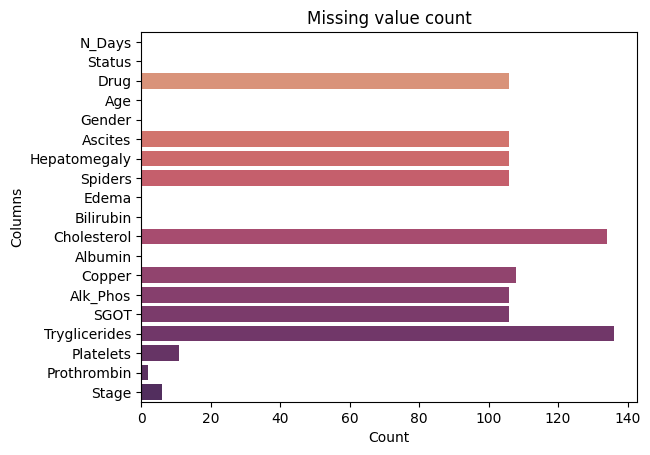

In [203]:
#Checking for null values
null_values = data.isna().sum()
print(null_values)
sns.barplot(y=null_values.index, x=null_values.values,palette="flare")
plt.title("Missing value count")
plt.xlabel("Count")
plt.ylabel("Columns")

In [204]:
#Handling the missing values using SimpleImputer for numerical values
from sklearn.impute import SimpleImputer
attributes = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
imputer = SimpleImputer(strategy='mean')
imputer.fit(data[attributes])
data[attributes] = imputer.transform(data[attributes])

In [205]:
data[attributes]

,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,261.000000,156.000000,1718.000000,137.950000,172.000000,190.0,12.2,4.0
1,302.000000,54.000000,7394.800000,113.520000,88.000000,221.0,10.6,3.0
2,176.000000,210.000000,516.000000,96.100000,55.000000,151.0,12.0,4.0
3,244.000000,64.000000,6121.800000,60.630000,92.000000,183.0,10.3,4.0
4,279.000000,143.000000,671.000000,113.150000,72.000000,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...
413,369.510563,97.648387,1982.655769,122.556346,124.702128,174.0,10.9,3.0
414,369.510563,97.648387,1982.655769,122.556346,124.702128,180.0,11.2,4.0
415,369.510563,97.648387,1982.655769,122.556346,124.702128,143.0,9.9,3.0
416,369.510563,97.648387,1982.655769,122.556346,124.702128,269.0,10.4,3.0


In [206]:
#Handling the missing values using SimpleImputer for categorical values
from sklearn.impute import SimpleImputer
attributes_obj = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(data[attributes_obj])
data[attributes_obj] = imputer.transform(data[attributes_obj])

In [207]:
data[attributes_obj]

,Drug,Ascites,Hepatomegaly,Spiders
0,D-penicillamine,Y,Y,Y
1,D-penicillamine,N,Y,Y
2,D-penicillamine,N,N,N
3,D-penicillamine,N,Y,Y
4,Placebo,N,Y,Y
...,...,...,...,...
413,D-penicillamine,N,Y,N
414,D-penicillamine,N,Y,N
415,D-penicillamine,N,Y,N
416,D-penicillamine,N,Y,N


In [208]:
#Checking for null values
data.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Gender           0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [210]:
#Count of unique values in each variables
data.nunique()

N_Days           399
Status             3
Drug               2
Age              344
Gender             2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         98
Cholesterol      202
Albumin          154
Copper           159
Alk_Phos         296
SGOT             180
Tryglicerides    147
Platelets        244
Prothrombin       49
Stage              5
dtype: int64

In [211]:
#Checking for duplicate values
data.duplicated().sum()

0

In [212]:
#Data types of all the variables
data.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Gender            object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

Text(0.5, 1.0, 'Gender wise cirrhosis stages')

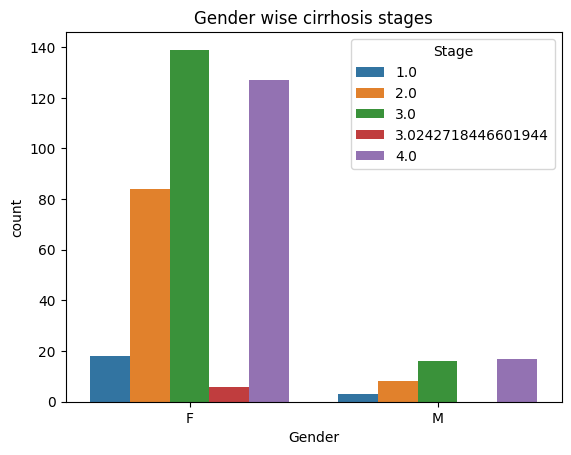

In [213]:
#Plot for gender wise cirrhosis stages
sns.countplot(x='Gender', hue='Stage', data=data)
plt.title("Gender wise cirrhosis stages")

Text(0.5, 1.0, 'Drug wise cirrhosis stages')

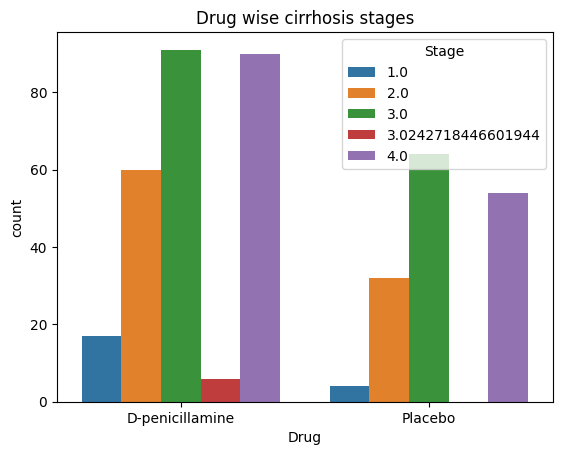

In [214]:
#Plot for drug wise cirrhosis stages
sns.countplot(x='Drug', hue='Stage', data=data)
plt.title("Drug wise cirrhosis stages")

In [215]:
#Summary measures
data.describe().T.style.background_gradient(cmap='YlGnBu')

,count,mean,std,min,25%,50%,75%,max
N_Days,418.000000,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
Age,418.000000,18533.351675,3815.845055,9598.000000,15644.500000,18628.000000,21272.500000,28650.000000
Bilirubin,418.000000,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,418.000000,369.510563,191.077413,120.000000,273.000000,369.510563,369.510563,1775.000000
Albumin,418.000000,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,418.000000,97.648387,73.697982,4.000000,51.250000,97.648387,100.750000,588.000000
Alk_Phos,418.000000,1982.655769,1848.437803,289.000000,1016.250000,1717.000000,1982.655769,13862.400000
SGOT,418.000000,122.556346,48.965657,26.350000,91.000000,122.556346,135.750000,457.250000
Tryglicerides,418.000000,124.702128,53.479887,33.000000,95.000000,124.702128,127.750000,598.000000
Platelets,418.000000,257.024570,97.020057,62.000000,190.000000,253.000000,315.500000,721.000000


### **CORRELATION ANALYSIS**

* Correlation analysis is a statistical technique used to measure the strength and direction of the linear relationship between two or more variables.

* It helps us understand the extent to which changes in one variable are associated with changes in another variable.

* In correlation analysis, the correlation coefficient is calculated, which quantifies the degree of association between variables.

**Correlation Matrix:**

* A correlation matrix is a table that displays the correlation coefficients between multiple variables.

* It provides a comprehensive view of the correlations between variables in a dataset, allowing us to identify patterns and relationships.

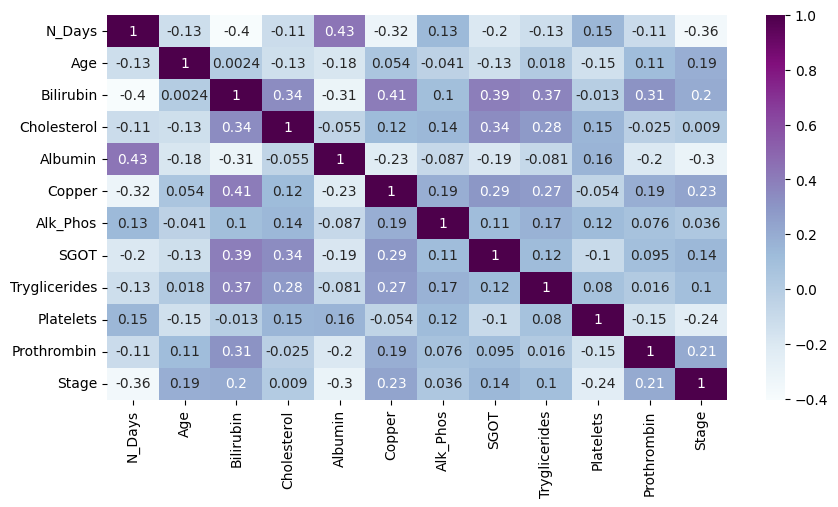

In [216]:
# plot heatmap to check the correlation
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), cmap="BuPu", annot=True)
plt.show()

# **FEATURE ENCODING**

Encoding refers to the process of converting categorical variables into numerical representations that machine learning algorithms can understand. Categorical variables are variables that represent different categories or labels, such as colors, types of objects, or groups.

In [217]:
#Convert the categorical variables to numerical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])
data['Drug'] = le.fit_transform(data['Drug'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])
data.head()

,N_Days,Status,Drug,Age,Gender,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [218]:
#Independent variables
x = data.drop(['Status', 'Stage'], axis=1)

In [219]:
#Columns in the independent variable
x.columns

Index(['N_Days', 'Drug', 'Age', 'Gender', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')

In [220]:
x.dtypes

N_Days             int64
Drug               int64
Age                int64
Gender             int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Edema              int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
dtype: object

In [221]:
#Converting x values into int datatype
x = x.astype(int)
x.dtypes

N_Days           int64
Drug             int64
Age              int64
Gender           int64
Ascites          int64
Hepatomegaly     int64
Spiders          int64
Edema            int64
Bilirubin        int64
Cholesterol      int64
Albumin          int64
Copper           int64
Alk_Phos         int64
SGOT             int64
Tryglicerides    int64
Platelets        int64
Prothrombin      int64
dtype: object

In [222]:
#Count of attributes in the independent variable
len(x.columns)

17

In [223]:
#Dependent variable
y = data['Stage'].values

In [224]:
#Converting x values into int datatype
import pandas as pd
y = y.astype(int)
y.dtype

dtype('int64')

In [228]:
#Count of each values for the variable 'Stage'
data['Stage'].value_counts()

3.000000    155
4.000000    144
2.000000     92
1.000000     21
3.024272      6
Name: Stage, dtype: int64

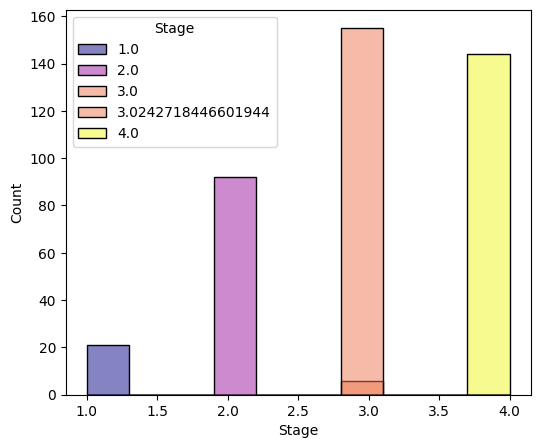

In [229]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x='Stage',hue="Stage",palette="plasma", kde=True);

# **FEATURE SELECTION**

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

### **ANOVA:**

* ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

* The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.

In [230]:
# SelectKBest -- Select features according to the k highest scores.
# f_classif -- Compute the ANOVA F-value for the provided sample.
#F- Value - It is the ratio of two Chi-distributions divided by its degrees of Freedom
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
select = SelectKBest(f_classif,k=10)
z = select.fit_transform(x,y)

print("After selecting best 10 features:", z.shape)

After selecting best 10 features: (418, 10)


In [231]:
#List of selected features
New_features=select.get_feature_names_out()
list(New_features)

['N_Days',
 'Age',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Albumin',
 'Copper',
 'Platelets',
 'Prothrombin']

In [232]:
#Ranking the selected features based on its importance
best_cols = select.get_support(indices=True)
best_cols

array([ 0,  2,  4,  5,  6,  7, 10, 11, 15, 16])

N_Days 21.488542307233633
Drug 1.2115725788108929
Age 6.7838656722813715
Gender 0.3149759327472831
Ascites 11.457374278421824
Hepatomegaly 21.247381693615147
Spiders 9.394485669529606
Edema 11.08104614634007
Bilirubin 6.4379442078562255
Cholesterol 3.0924401837977005
Albumin 8.593696565464974
Copper 8.365609021316448
Alk_Phos 0.32417950937867446
SGOT 3.611429725692297
Tryglicerides 2.119356381474344
Platelets 9.391297991370479
Prothrombin 14.676956662079517


Text(0, 0.5, 'Features')

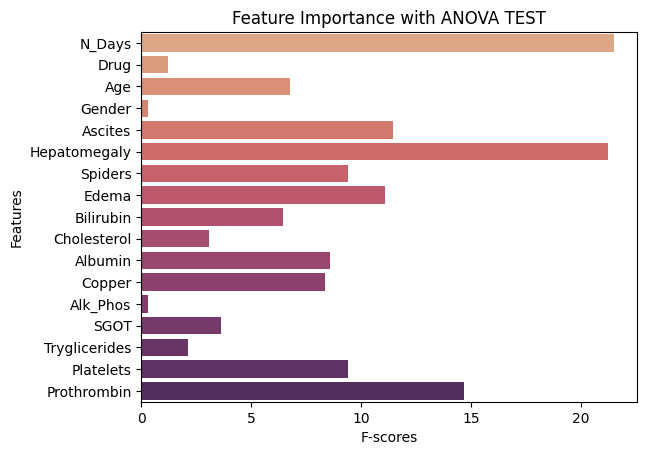

In [233]:
#Scores of features on their importances
scores = select.scores_
pvalues = select.pvalues_
cols = x.columns
for idx in range(x.shape[1]):
  print(cols[idx], scores[idx])

#Plot the scores of the features on their importances
  sns.barplot(y=cols,x=scores,palette="flare")
plt.title("Feature Importance with ANOVA TEST")
plt.xlabel("F-scores")
plt.ylabel("Features")

In [236]:
#Handling imbalanced dataset
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

# **TRAIN VALIDATION AND TEST SETS**

In [237]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [238]:
print(f"Shape of Train set : {np.shape(x_train)}")
print(f"Shape of Test set : {np.shape(x_test)}")
print(f"Shape of Train set : {np.shape(y_train)}")
print(f"Shape of Test set : {np.shape(y_test)}")

Shape of Train set : (515, 17)
Shape of Test set : (129, 17)
Shape of Train set : (515,)
Shape of Test set : (129,)


# **NORMALIZATION**

In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **MODEL BUILDING**

### **LOGISTIC REGRESSION**

* Logistic regression is used for solving the classification problems.

* It is used for predicting the categorical dependent variable using a given set of independent variables.

* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc..

In [240]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred_lr,y_test))
print("precision score : ",precision_score(y_pred_lr,y_test,average='micro'))
print("recall score : ",recall_score(y_pred_lr,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred_lr,y_test,average='micro'))

Accuracy score :  0.5503875968992248
precision score :  0.5503875968992248
recall score :  0.5503875968992248
f1 score :  0.5503875968992248


### **RANDOM FOREST CLASSIFIER**

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [241]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred_rfc,y_test))
print("precision score : ",precision_score(y_pred_rfc,y_test,average='micro'))
print("recall score : ",recall_score(y_pred_rfc,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred_rfc,y_test,average='micro'))

Accuracy score :  0.7286821705426356
precision score :  0.7286821705426356
recall score :  0.7286821705426356
f1 score :  0.7286821705426357


### **DECISION TREE CLASSIFIER**

* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [243]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred_dtc,y_test))
print("precision score : ",precision_score(y_pred_dtc,y_test,average='micro'))
print("recall score : ",recall_score(y_pred_dtc,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred_dtc,y_test,average='micro'))

Accuracy score :  0.5426356589147286
precision score :  0.5426356589147286
recall score :  0.5426356589147286
f1 score :  0.5426356589147286


### **SUPPORT VECTOR CLASSIFIER**

* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

* SVM chooses the extreme points/vectors that help in creating the hyperplane.
* These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [244]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred_svc,y_test))
print("precision score : ",precision_score(y_pred_svc,y_test,average='micro'))
print("recall score : ",recall_score(y_pred_svc,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred_svc,y_test,average='micro'))

Accuracy score :  0.5736434108527132
precision score :  0.5736434108527132
recall score :  0.5736434108527132
f1 score :  0.5736434108527132


### **K-NEAREST NEIGHBOR**

* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

In [245]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred_knn,y_test))
print("precision score : ",precision_score(y_pred_knn,y_test,average='micro'))
print("recall score : ",recall_score(y_pred_knn,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred_knn,y_test,average='micro'))

Accuracy score :  0.627906976744186
precision score :  0.627906976744186
recall score :  0.627906976744186
f1 score :  0.627906976744186


# **EVALUATION METRICS OF VARIOUS MACHINE LEARNING MODELS**

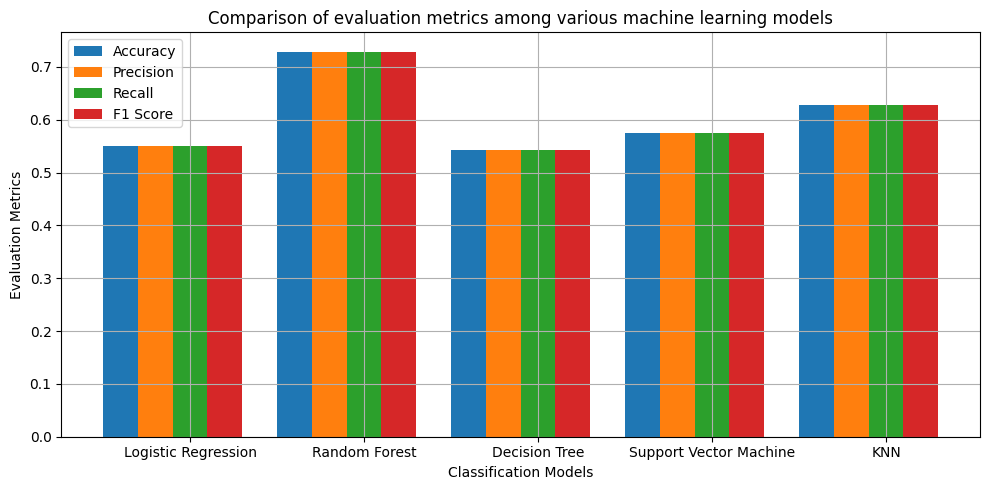

In [246]:
# plot the evaluation metrics for each model
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine', 'KNN']
accuracy = [0.55, 0.729, 0.543, 0.574, 0.628]
precision = [0.55, 0.729, 0.543, 0.574, 0.628]
recall = [0.55, 0.729, 0.543, 0.574, 0.628]
f1_score = [0.55, 0.729, 0.543, 0.574, 0.628]

num_models = len(model_names)
bar_width = 0.2
bar_positions = np.arange(num_models)
fig, ax = plt.subplots()

# Create the bar plots for each evaluation metric
accuracy_bar = ax.bar(bar_positions, accuracy, bar_width, label='Accuracy')
precision_bar = ax.bar(bar_positions + bar_width, precision, bar_width, label='Precision')
recall_bar = ax.bar(bar_positions + 2 * bar_width, recall, bar_width, label='Recall')
f1_score_bar = ax.bar(bar_positions + 3 * bar_width, f1_score, bar_width, label='F1 Score')

# Set the labels and tick positions in the chart
ax.set_xlabel('Classification Models')
ax.set_xticks(bar_positions + 2 * bar_width)
ax.set_xticklabels(model_names)
fig.set_size_inches(10, 5)
ax.set_ylabel('Evaluation Metrics')
ax.set_title('Comparison of evaluation metrics among various machine learning models')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# **KFOLD CROSS VALIDATION FOR VARIOUS MACHINE LEARNING MODELS**

In [247]:
from sklearn.model_selection import cross_val_score, KFold
cv=KFold(n_splits=5, random_state=0, shuffle=True)

scores = cross_val_score(lr, x_train, y_train, cv = cv,scoring='accuracy')
print("Logistics Regression Average CV Score: ",scores.mean())

scores = cross_val_score(rfc, x_train, y_train, cv = cv,scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

scores = cross_val_score(dtc, x_train, y_train, cv = cv,scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

scores = cross_val_score(svc, x_train, y_train, cv = cv,scoring='accuracy')
print("Support Vector Machine Average CV Score: ",scores.mean())

scores = cross_val_score(knn, x_train, y_train, cv = cv,scoring='accuracy')
print("KNeighbors Average CV Score: ",scores.mean())

Logistics Regression Average CV Score:  0.5262135922330098
Random Forest Average CV Score:  0.6679611650485437
Decision Tree Average CV Score:  0.5572815533980583
Support Vector Machine Average CV Score:  0.5941747572815534
KNeighbors Average CV Score:  0.5728155339805825


### **PLOT FOR ACCURACY ON VARIOUS MACHINE LEARNING MODELS**

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Random Forest'),
 Text(2, 0, 'Decision Tree'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'KNN')]

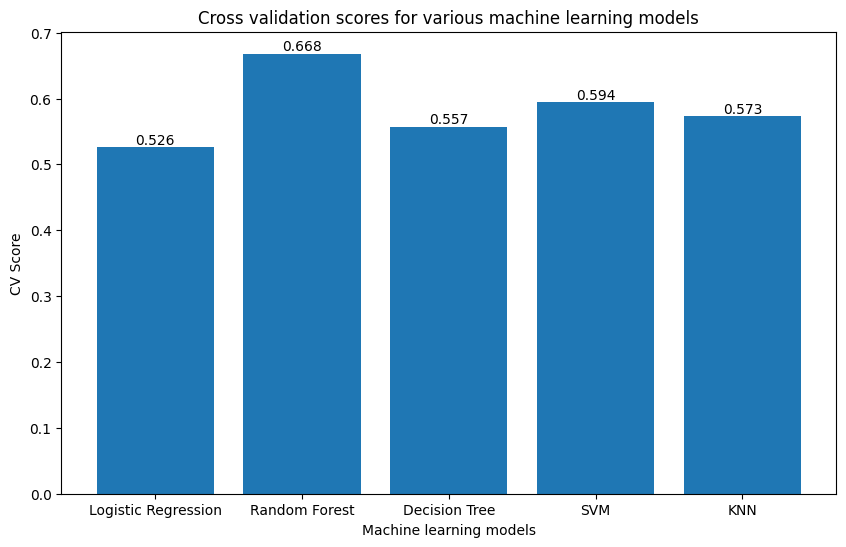

In [253]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']
cv_score = [0.526, 0.668, 0.557, 0.594, 0.573]

position = range(len(models))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(position, cv_score)

for i, v in enumerate(cv_score):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.set_xlabel('Machine learning models')
ax.set_ylabel('CV Score')
ax.set_title('Cross validation scores for various machine learning models')
ax.set_xticks(position)
ax.set_xticklabels(models)

### **COMPARISON OF ACCURACY AND AVERAGE OF CROSS VALIDATION SCORES ON VARIOUS MACHINE LEARNING MODELS**

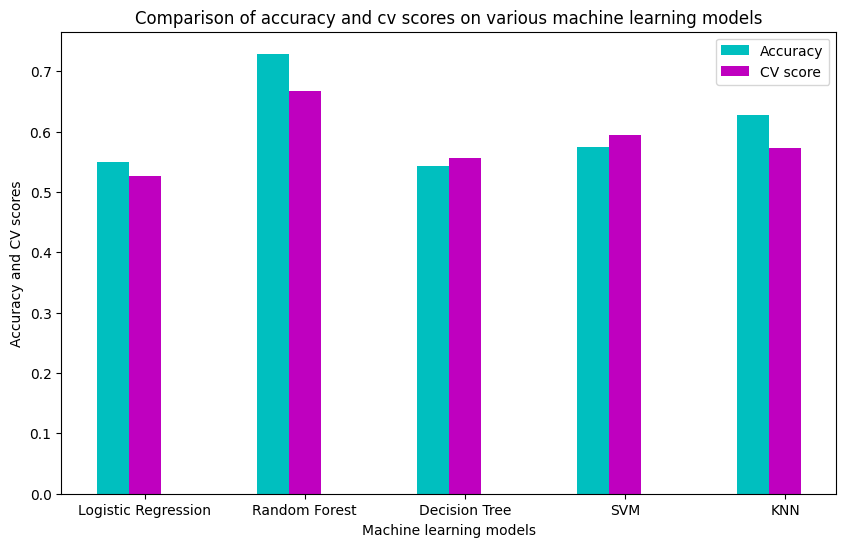

In [256]:
#plot to compare the accuracy and cv scores among various machine learning models
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']
accuracy = [0.55, 0.729, 0.543, 0.574, 0.628]
cv_score = [0.526, 0.668, 0.557, 0.594, 0.573]

position = range(len(models))
plt.figure(figsize=(10, 6))
bar_width = 0.2
plt.bar(position, accuracy, color='c', width=bar_width, label='Accuracy')
plt.bar([p + bar_width for p in position], cv_score, color='m', width=bar_width, label='CV score')
plt.xlabel('Machine learning models')
plt.ylabel('Accuracy and CV scores')
plt.title('Comparison of accuracy and cv scores on various machine learning models')
plt.xticks([p + bar_width for p in position], models)
plt.legend()
plt.show()

## Random Forest Classifier is the top performer

# **HYPERPARAMETER TUNING**

In [257]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7}]
}

Classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'class_weight': None, 'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.6194


# **FINAL MODEL**

In [258]:
classifier = RandomForestClassifier(class_weight = None, max_depth = 7, max_features = 'log2', min_samples_split = 2, n_estimators = 100)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

### **EVALUATION METRICS**

* The confusion matrix provides insights into the correct and incorrect predictions for each class, allowing for a detailed analysis of accuracy.

* The classification report includes metrics such as F1 score, precision, recall, and accuracy for each class, providing a comprehensive analysis of performance metrics for classification models.

**Accuracy:** Accuracy is an evaluation metric that allows you to measure the total number of predictions a model gets right.

**Precision:** It measures the proportion of correctly predicted positive instances (TP) out of the total instances predicted as positive (TP + FP). It represents the model's ability to minimize false positives.

**Recall (Sensitivity or True Positive Rate):** It measures the proportion of correctly predicted positive instances (TP) out of the total actual positive instances (TP + FN). It represents the model's ability to minimize false negatives.

**F1 Score:** It is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy. It is particularly useful when dealing with imbalanced datasets.

**Confusion Matrix:**

* The confusion matrix is a table that shows the performance of a classification model by summarizing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

* It provides a detailed breakdown of the model's predictions for each class, allowing us to evaluate its performance on different classes separately.

* The rows of the matrix represent the actual classes, while the columns represent the predicted classes.

* The diagonal elements of the matrix represent the correct predictions, while the off-diagonal elements represent the incorrect predictions.

* By analyzing the confusion matrix, we can assess the model's accuracy, precision, recall, and other metrics for each class.

**Classification Report:**

The classification report provides a comprehensive evaluation of a classification model's performance, including metrics such as precision, recall, F1 score, and support.

**Support:** It represents the number of instances in each class, indicating the distribution of the classes in the dataset.

By examining the confusion matrix and classification report, we can gain insights into a model's overall performance, identify potential areas of improvement, and compare the performance of different models based on various metrics.



Accuracy score :  0.6666666666666666
precision score :  0.6666666666666666
recall score :  0.6666666666666666
f1 score :  0.6666666666666666

classification report 

              precision    recall  f1-score   support

           1       0.88      0.83      0.86        36
           2       0.56      0.67      0.61        27
           3       0.58      0.40      0.47        35
           4       0.62      0.77      0.69        31

    accuracy                           0.67       129
   macro avg       0.66      0.67      0.66       129
weighted avg       0.67      0.67      0.66       129



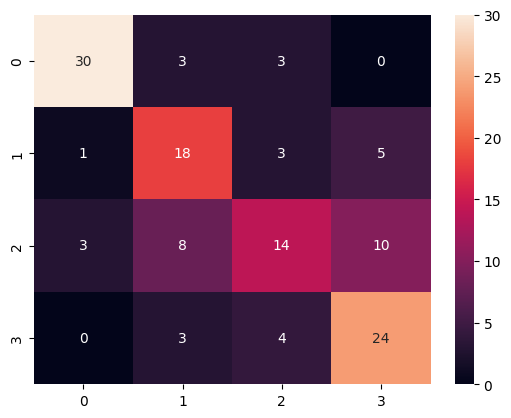

In [259]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
print(classification_report(y_pred, y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()

### **INFERENCE**

* 'N_Days' is the most important feature in the dataset

* Random forest classifier performs with the highest accuracy of 67%
